>**Task 3**

**Build a decision tree classifier to predict whether a customer will purchase a product or service based on their demographic and behavioral data. Use a dataset such as the Bank Marketing dataset from the UCI Machine Learning Repository.**

**Import Necessary Librarires**

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('bank-additional-full.csv' , delimiter=';'  )

**Details about the dataset**

In [3]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [4]:
df.tail()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
41183,73,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41184,46,blue-collar,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41185,56,retired,married,university.degree,no,yes,no,cellular,nov,fri,...,2,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,no
41186,44,technician,married,professional.course,no,no,no,cellular,nov,fri,...,1,999,0,nonexistent,-1.1,94.767,-50.8,1.028,4963.6,yes
41187,74,retired,married,professional.course,no,yes,no,cellular,nov,fri,...,3,999,1,failure,-1.1,94.767,-50.8,1.028,4963.6,no


In [5]:
df.shape

(41188, 21)

In [6]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [7]:
df.rename(columns={'y':'subscribed_deposit'}, inplace=True)

In [8]:
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [9]:
df.info

<bound method DataFrame.info of        age          job  marital            education  default housing loan  \
0       56    housemaid  married             basic.4y       no      no   no   
1       57     services  married          high.school  unknown      no   no   
2       37     services  married          high.school       no     yes   no   
3       40       admin.  married             basic.6y       no      no   no   
4       56     services  married          high.school       no      no  yes   
...    ...          ...      ...                  ...      ...     ...  ...   
41183   73      retired  married  professional.course       no     yes   no   
41184   46  blue-collar  married  professional.course       no      no   no   
41185   56      retired  married    university.degree       no     yes   no   
41186   44   technician  married  professional.course       no      no   no   
41187   74      retired  married  professional.course       no     yes   no   

         contact mo

In [10]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
df.isnull().sum()

age                   0
job                   0
marital               0
education             0
default               0
housing               0
loan                  0
contact               0
month                 0
day_of_week           0
duration              0
campaign              0
pdays                 0
previous              0
poutcome              0
emp.var.rate          0
cons.price.idx        0
cons.conf.idx         0
euribor3m             0
nr.employed           0
subscribed_deposit    0
dtype: int64

In [12]:
df.duplicated().sum()

12

In [13]:
df.drop_duplicates(inplace=True)

In [14]:
df.duplicated().sum()

0

**Check for outliers**

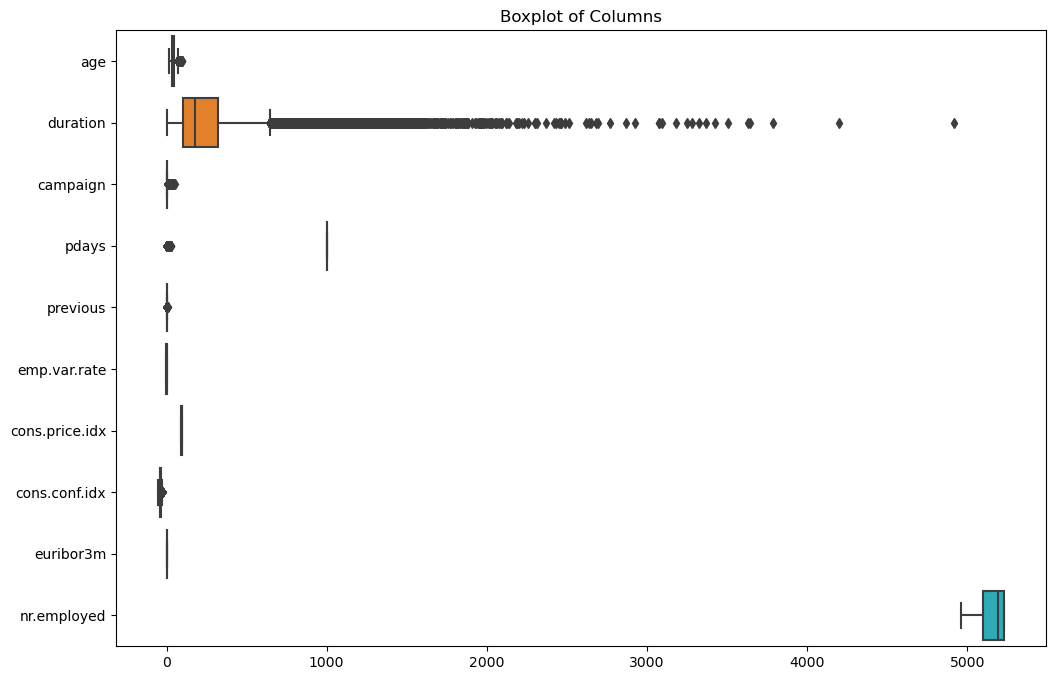

In [15]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, orient = 'h')
plt.title('Boxplot of Columns')
plt.show()

**Removing Outliers**

In [16]:
def remove_outlier(col):
    sorted(col)
    q1 , q3 = np.percentile(col, [25,75])
    IQR = q3 - q1
    LW = q1 - (1.5 * IQR)
    UW = q3 + (1.5 * IQR)
    return LW,UW

In [17]:
# Remove outliers for each column
for column in df.columns:
    if df[column].dtype != 'object':  # only consider numerical columns
        LW, UW = remove_outlier(df[column])
        df[column] = np.where(df[column] > UW, UW, df[column])
        df[column] = np.where(df[column] < LW, LW, df[column])

print("Outliers removed successfully!")

Outliers removed successfully!


**Check Outliers**

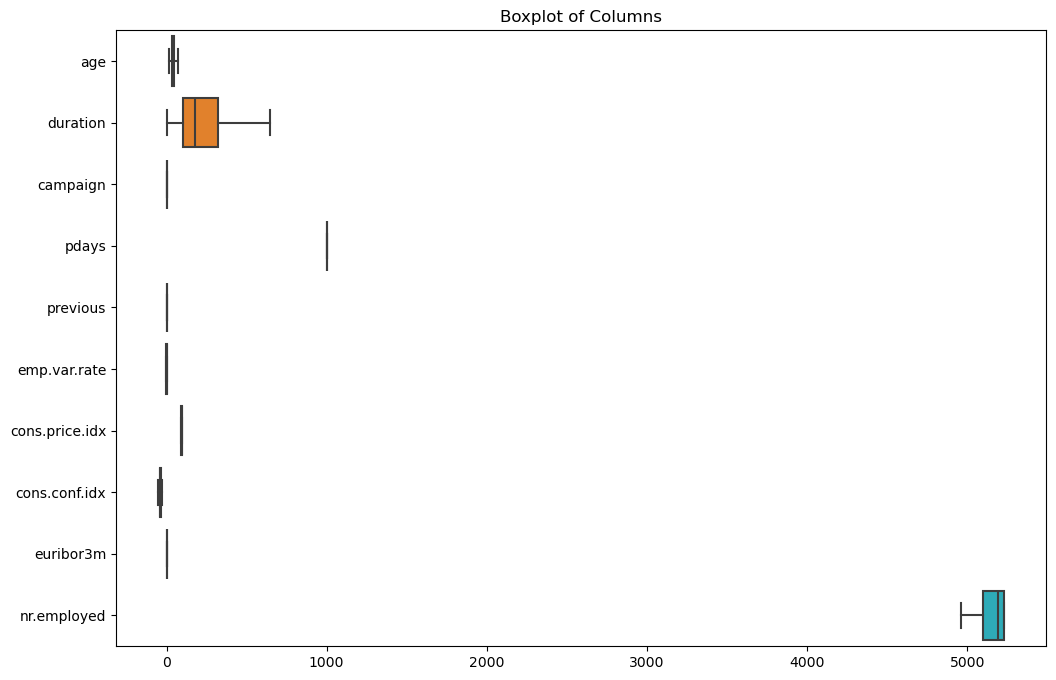

In [18]:
plt.figure(figsize = (12,8))
sns.boxplot(data = df, orient = 'h')
plt.title('Boxplot of Columns')
plt.show()

# Visualizing numerical columns using histogram

In [19]:
# Select numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

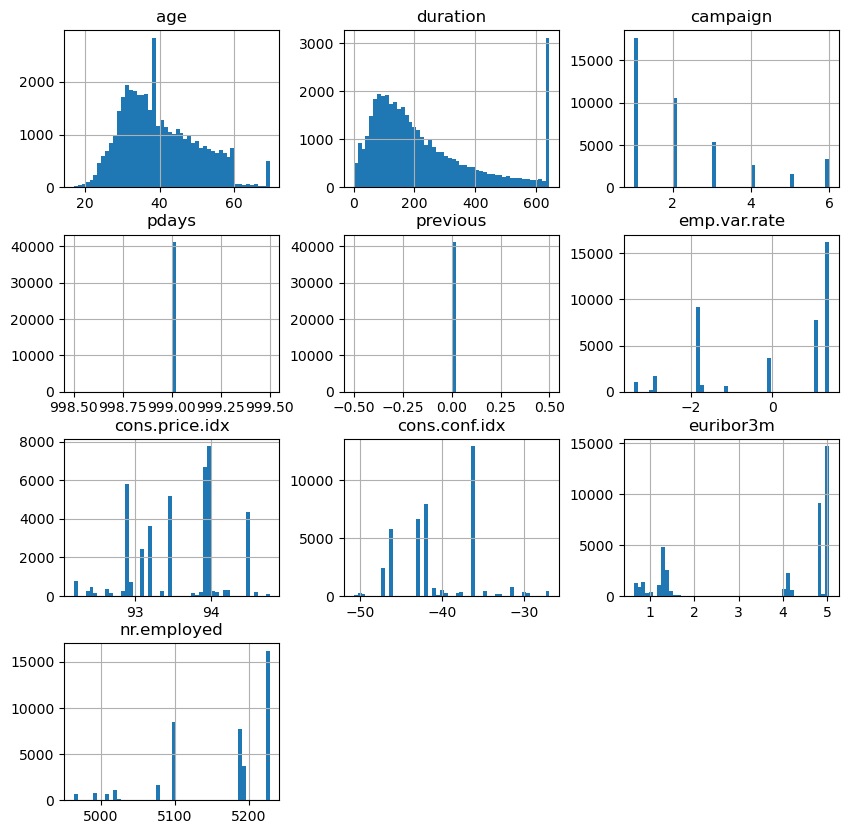

In [20]:
# Create a histogram for each numerical column
df.hist(figsize=(10, 10), bins=50)
plt.show()

# Create a bar graph for each categorical column

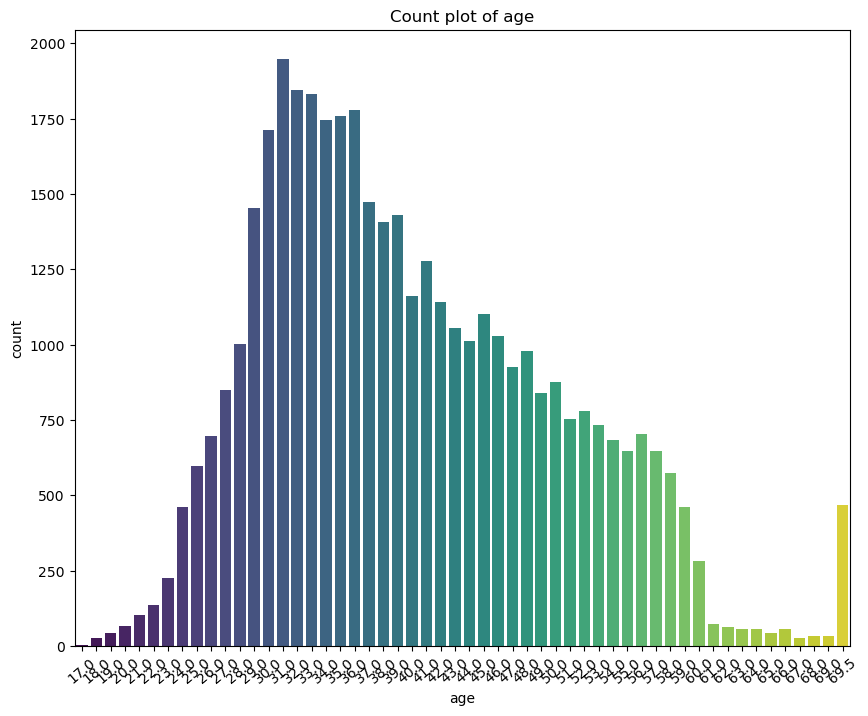

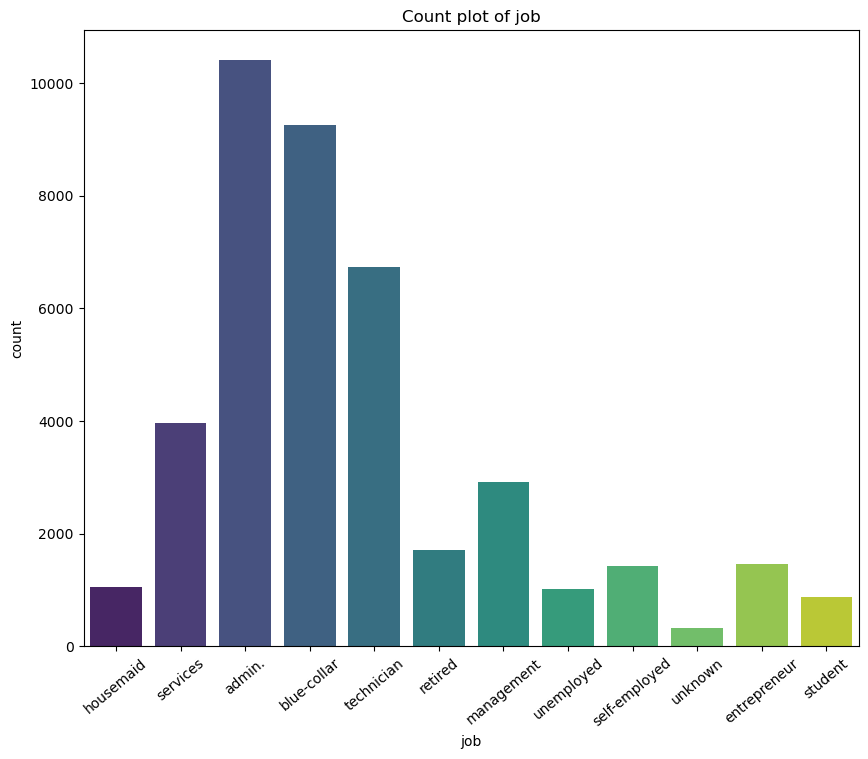

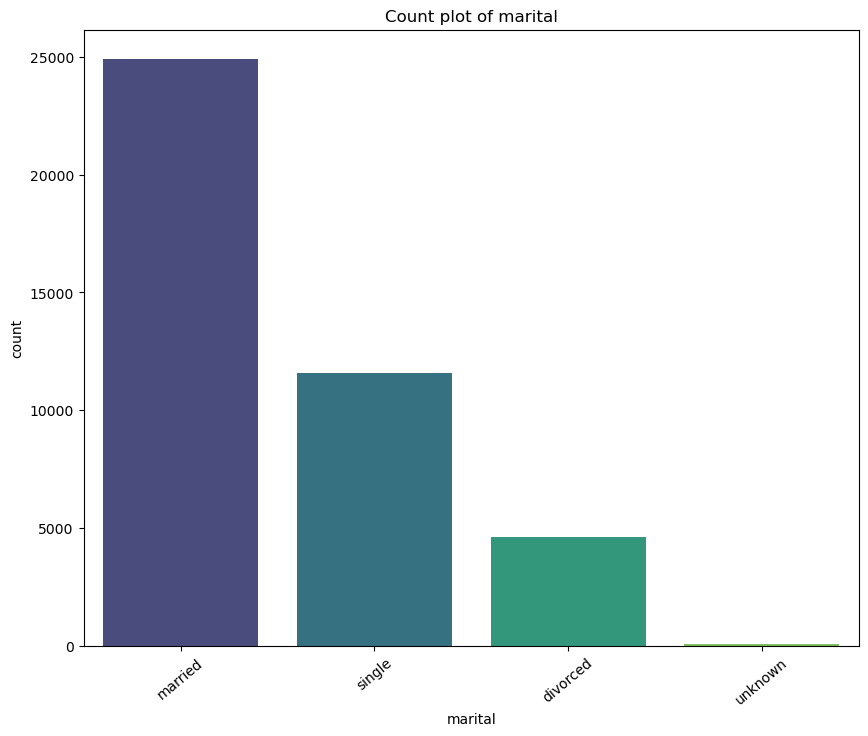

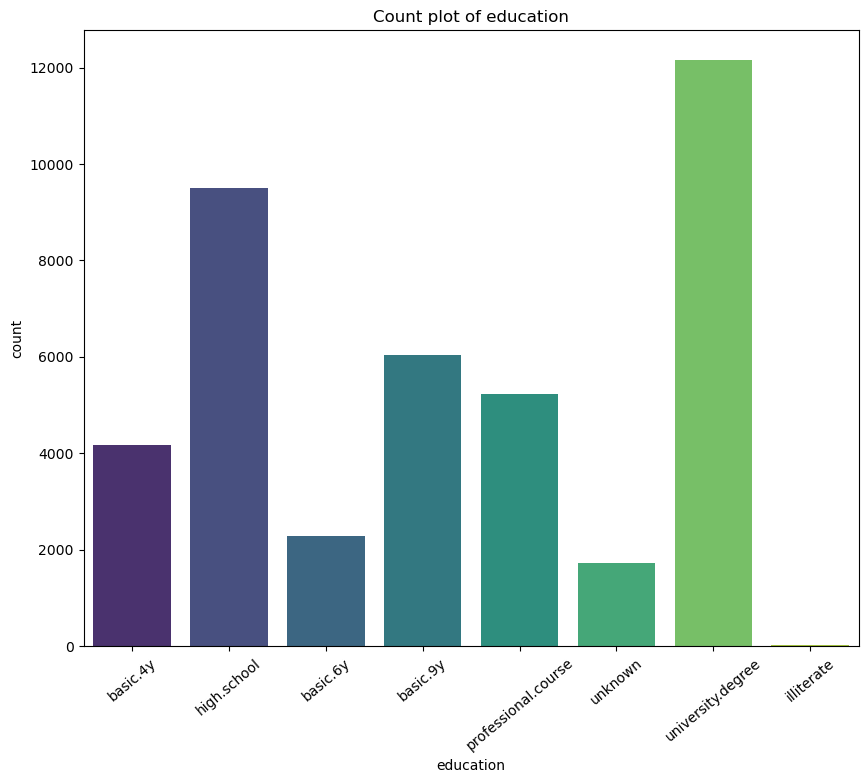

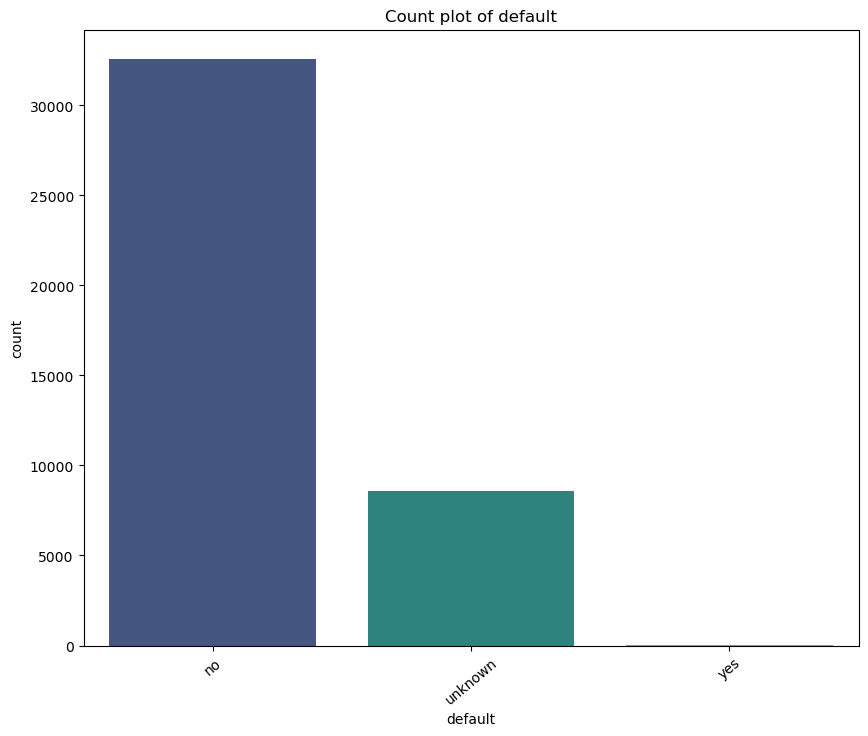

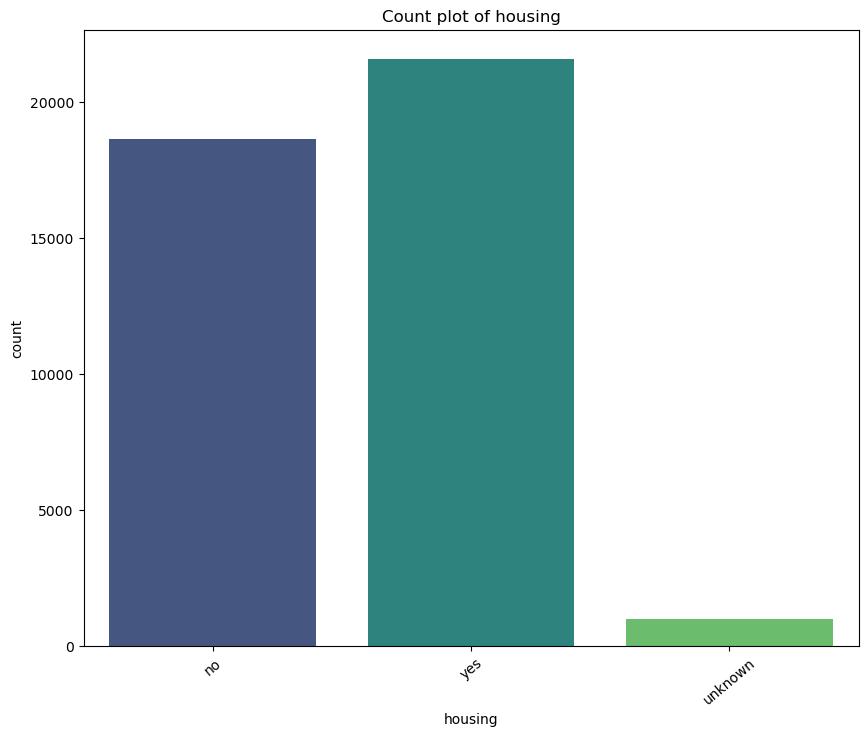

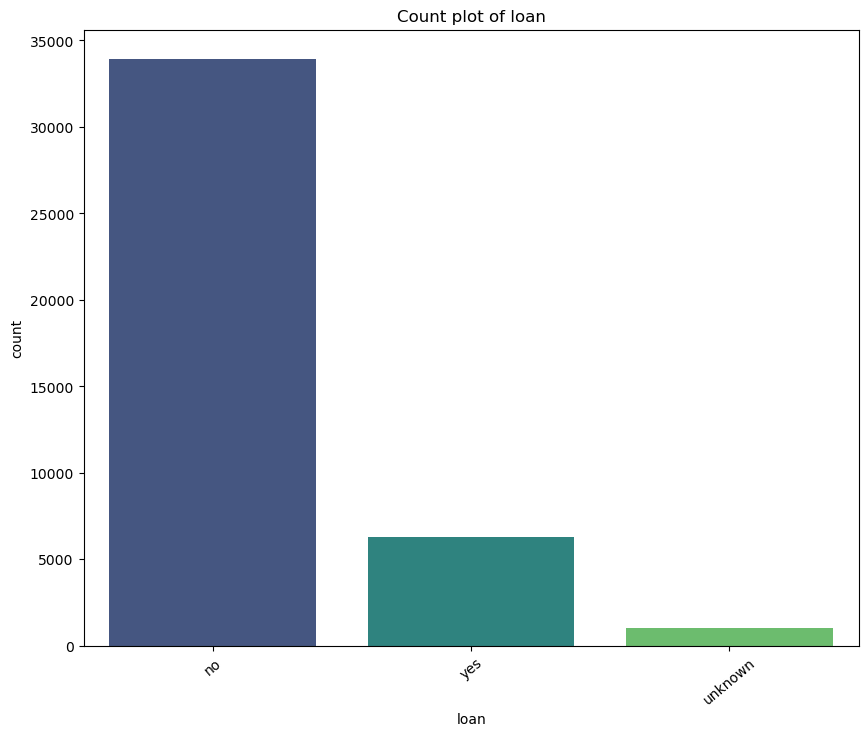

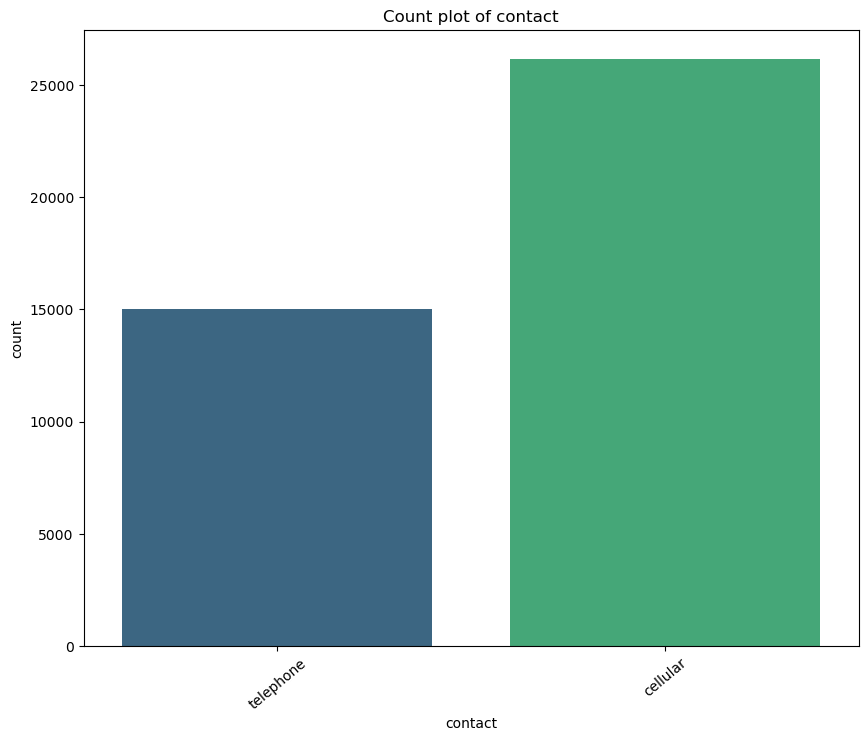

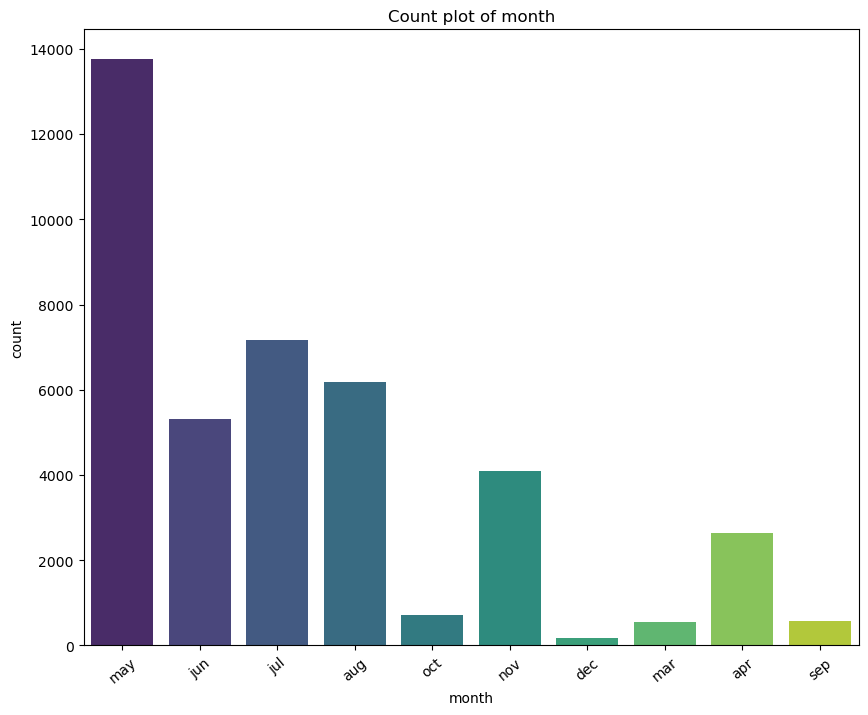

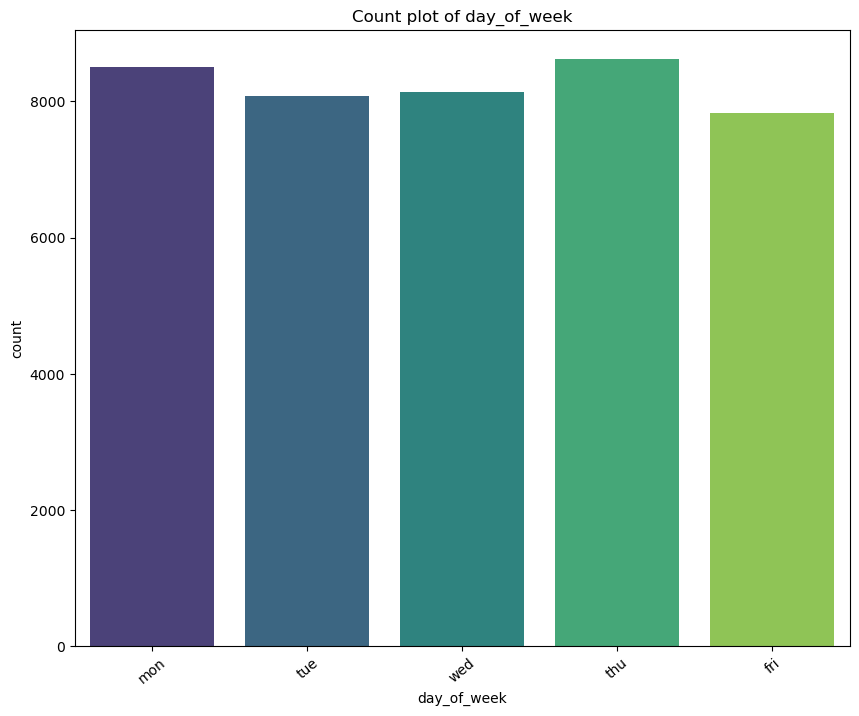

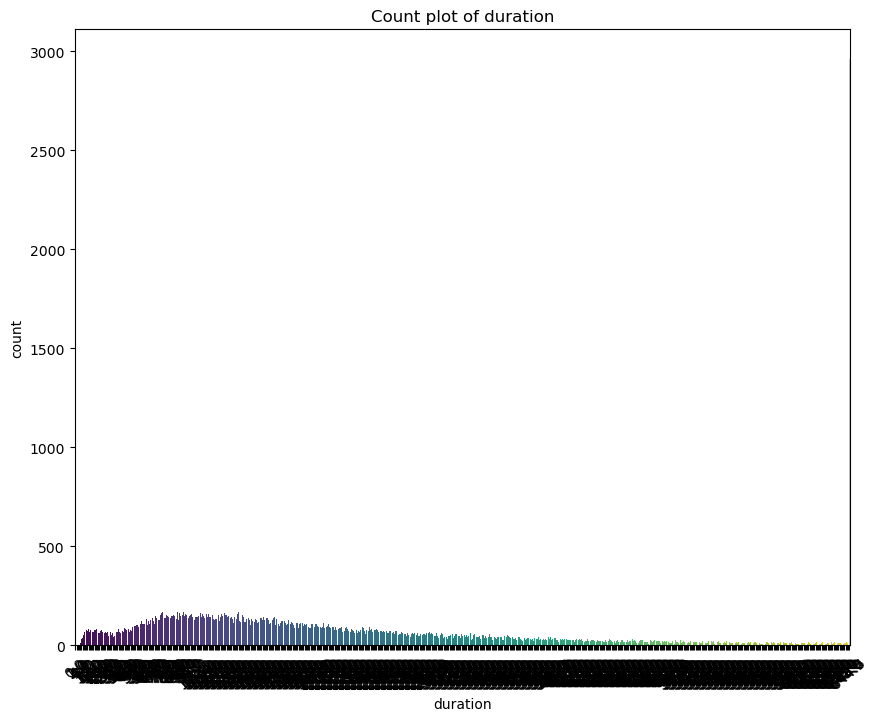

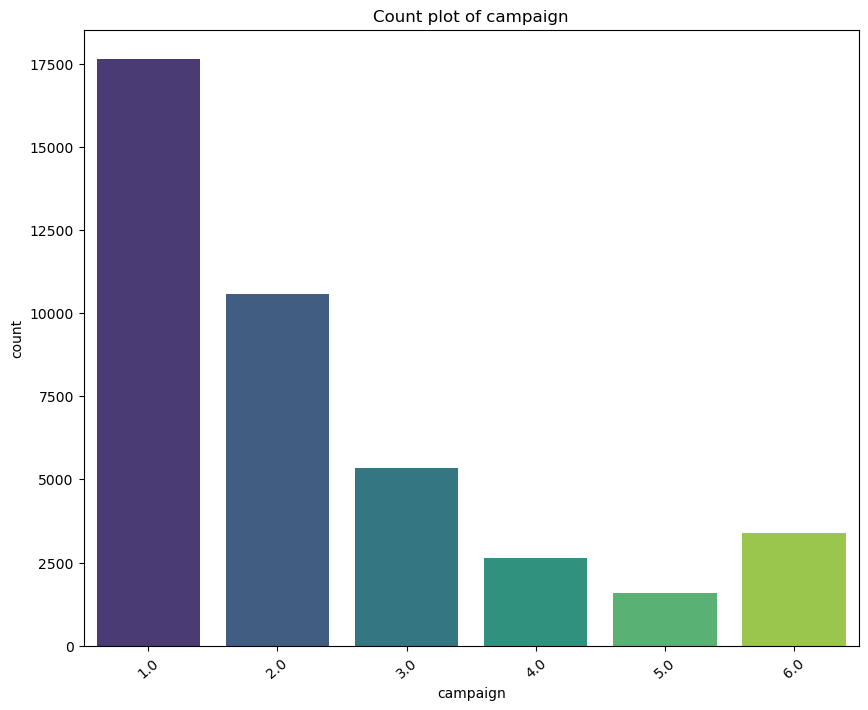

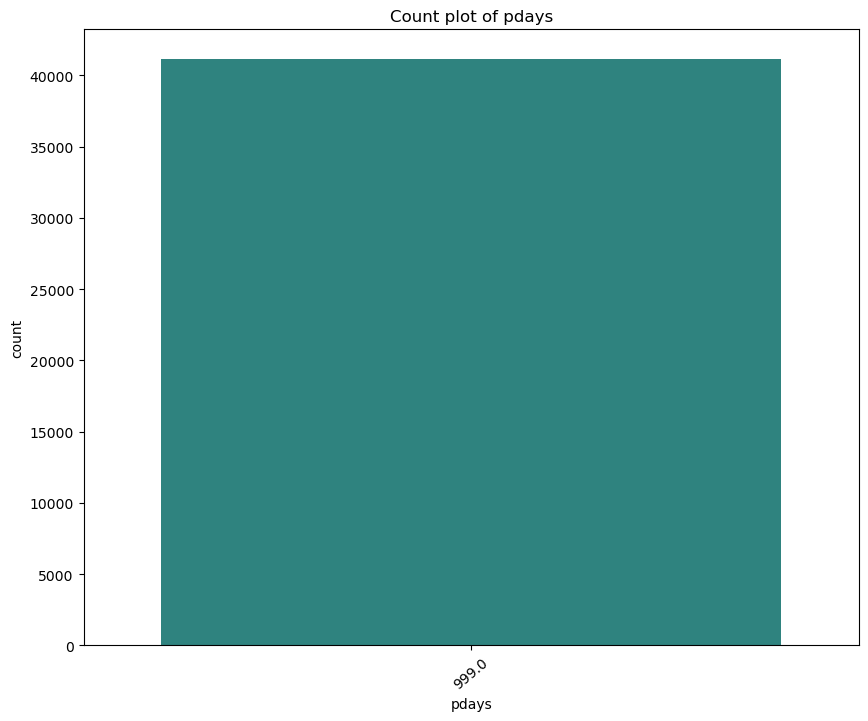

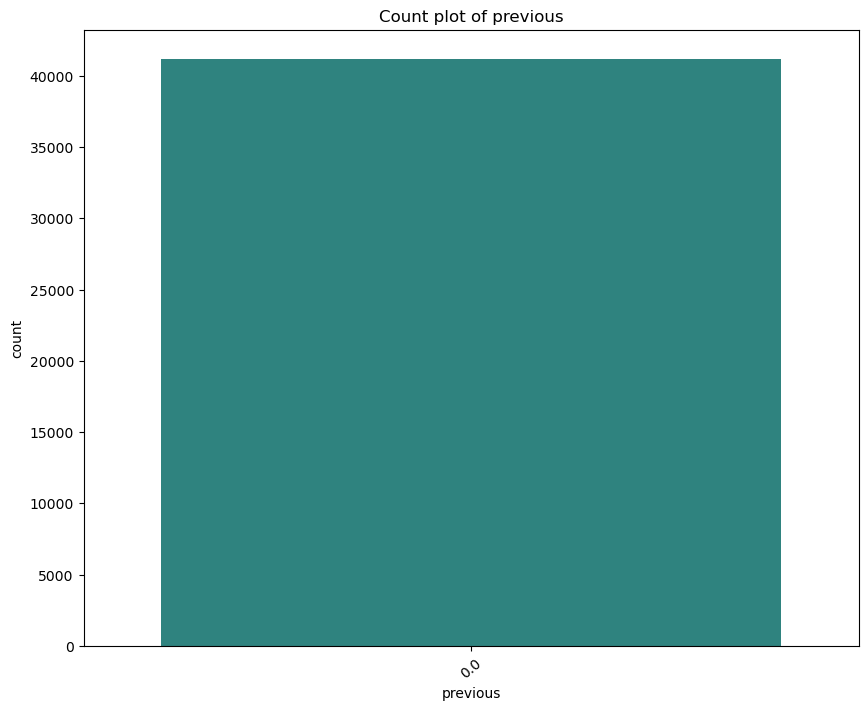

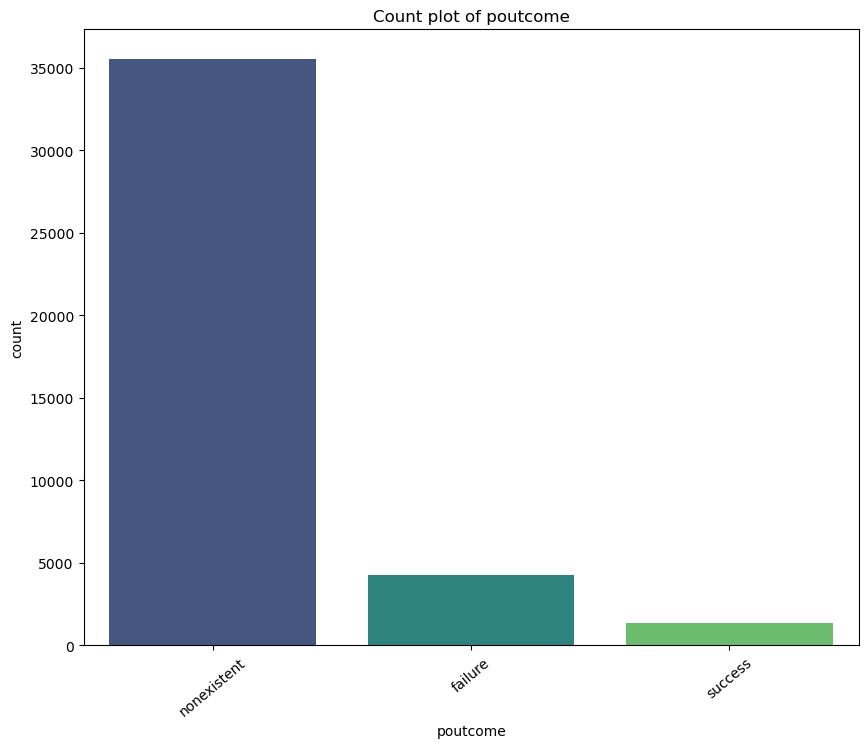

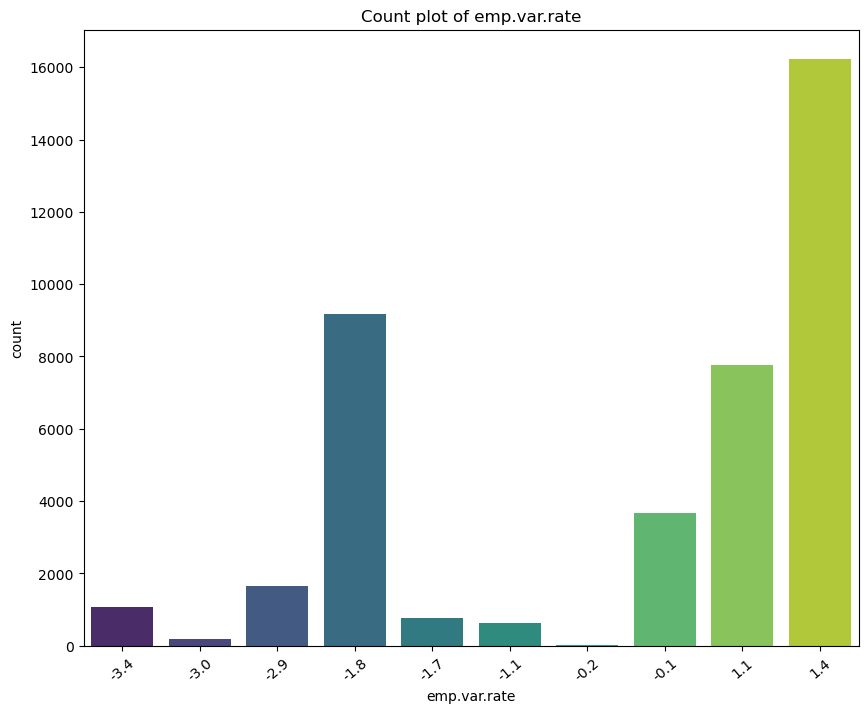

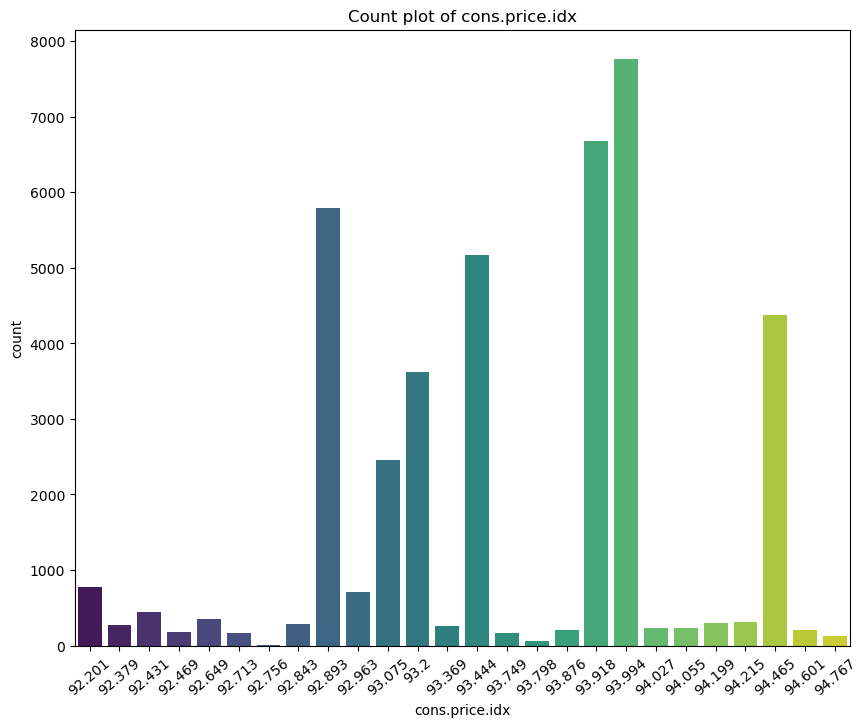

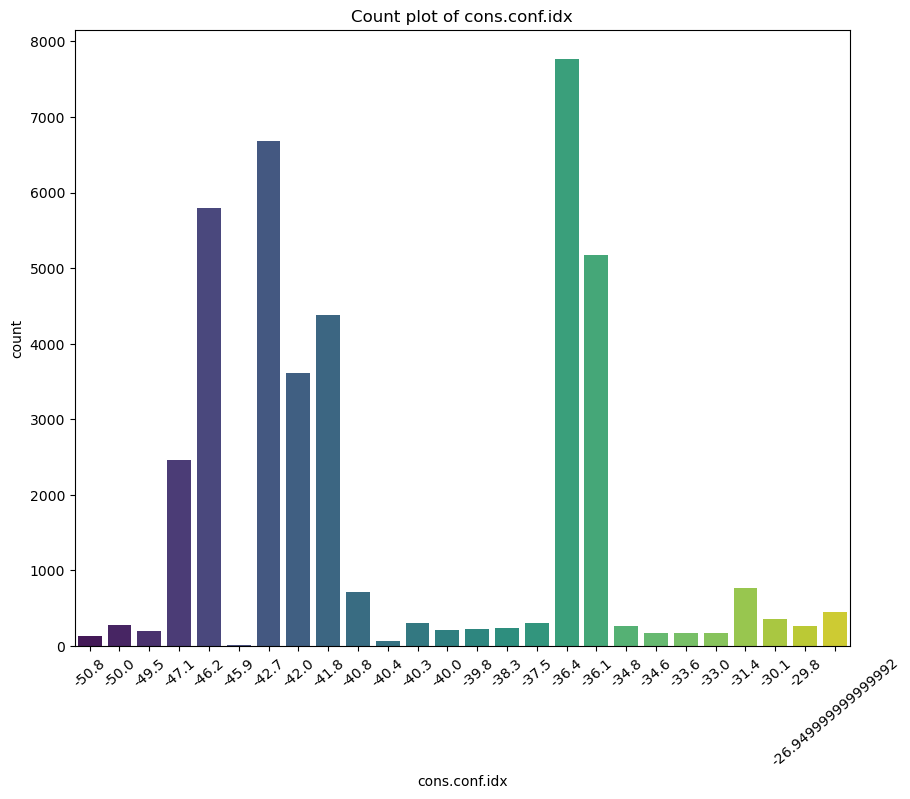

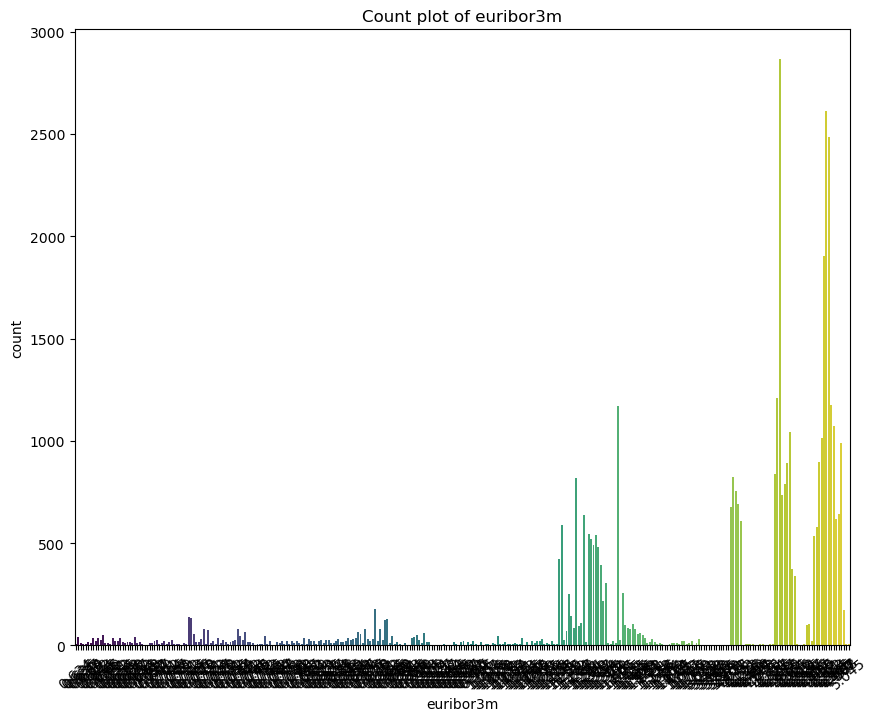

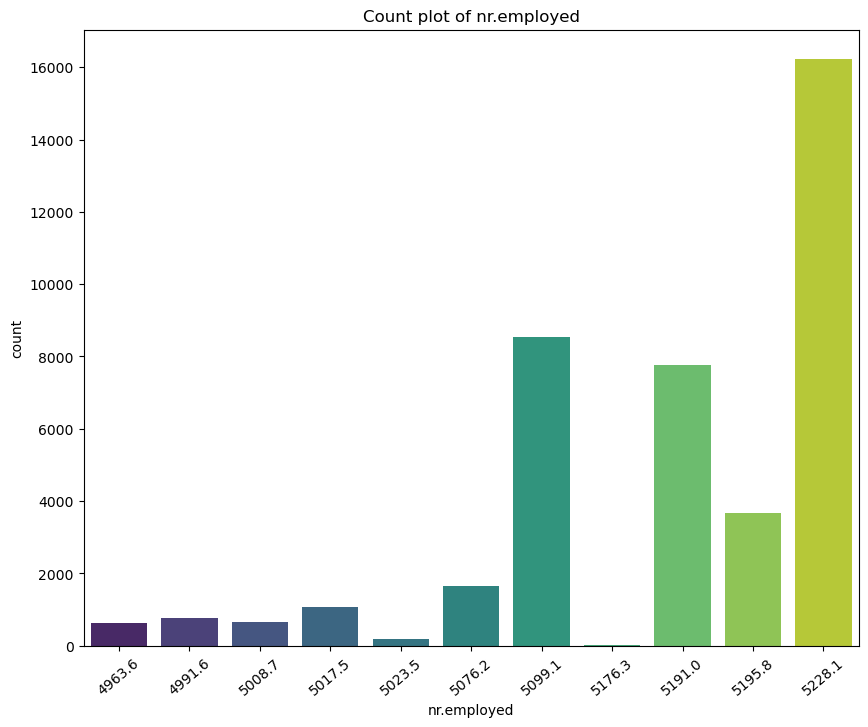

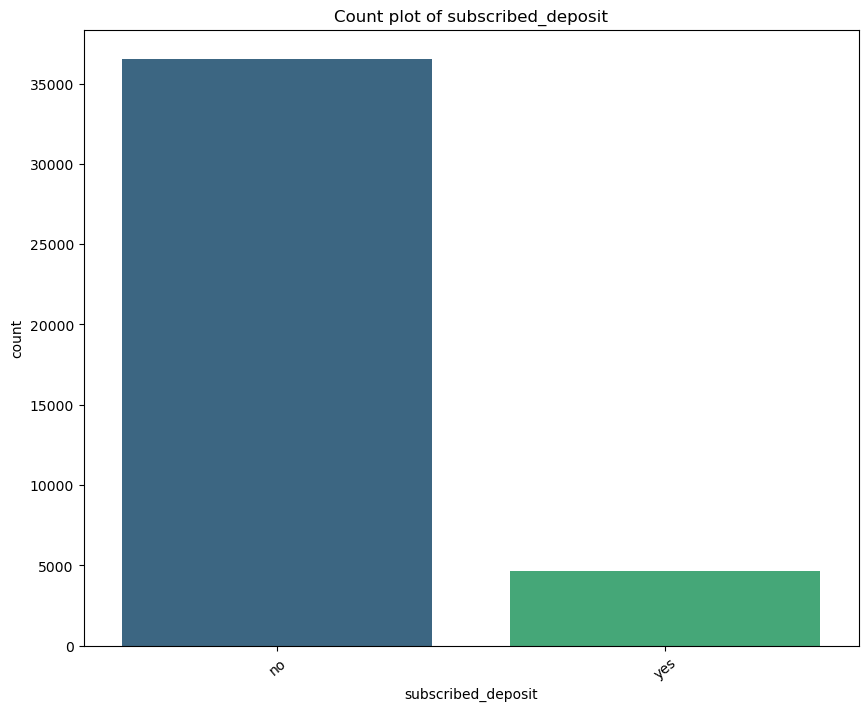

In [30]:
for feature in df:
    plt.figure(figsize=(10,8))
    plt.title(f"Count plot of {feature}")
    sns.countplot(x=feature,data=df,palette='viridis')
    plt.xticks(rotation=40)
    plt.show()

# Checking for correlation using heatmap

In [33]:
# Select only numerical columns
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns

In [34]:
# Calculate the correlation matrix
correlation_matrix = df[numerical_cols].corr()

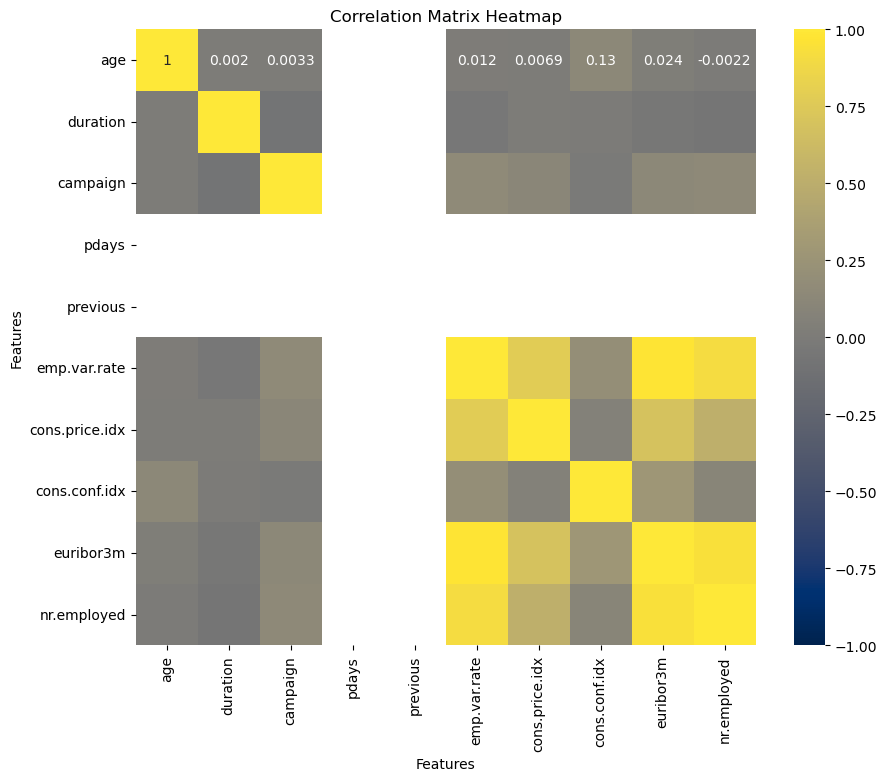

In [37]:
# Create a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='cividis', vmin=-1, vmax=1)
plt.title('Correlation Matrix Heatmap')
plt.xlabel('Features')
plt.ylabel('Features')
plt.show()

**Conversion of categorical columns into numerical columns using label encoder.**

In [53]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df_encoded = df.apply(le.fit_transform)
df_encoded

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,subscribed_deposit
0,39,3,1,0,0,0,0,1,6,1,...,0,0,0,1,8,18,16,287,8,0
1,40,7,1,3,1,0,0,1,6,1,...,0,0,0,1,8,18,16,287,8,0
2,20,7,1,3,0,2,0,1,6,1,...,0,0,0,1,8,18,16,287,8,0
3,23,0,1,1,0,0,0,1,6,1,...,0,0,0,1,8,18,16,287,8,0
4,39,7,1,3,0,0,2,1,6,1,...,0,0,0,1,8,18,16,287,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,53,5,1,5,0,2,0,0,7,0,...,0,0,0,1,5,25,0,171,0,1
41184,29,1,1,5,0,0,0,0,7,0,...,0,0,0,1,5,25,0,171,0,0
41185,39,5,1,6,0,2,0,0,7,0,...,1,0,0,1,5,25,0,171,0,0
41186,27,9,1,5,0,0,0,0,7,0,...,0,0,0,1,5,25,0,171,0,1


**Checking the target variable**

In [46]:
df_encoded['subscribed_deposit'].value_counts(normalize=True)*100

subscribed_deposit
0    88.733728
1    11.266272
Name: proportion, dtype: float64

In [55]:
## independent variables
X = df_encoded.iloc[:,:-1]   

## Target variable
y = df_encoded.iloc[:,-1] 

In [56]:
X.shape

(41176, 20)

In [57]:
y.shape

(41176,)

# Split the data into training and testing sets

In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [59]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
12348,12,2,1,1,0,2,2,1,3,0,286,2,0,0,1,9,17,6,303,10
8565,33,0,2,6,0,0,0,1,4,4,178,5,0,0,1,9,23,8,291,10
21424,12,0,2,6,0,0,0,0,1,3,103,3,0,0,1,9,13,17,307,10
3316,18,0,2,6,0,0,0,1,6,2,135,0,0,0,1,8,18,16,290,8
33246,23,1,2,3,1,0,0,0,6,3,418,0,0,0,1,3,8,4,209,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6266,17,1,1,2,0,0,2,1,6,3,100,1,0,0,1,8,18,16,287,8
11285,12,0,1,2,0,2,0,1,4,2,120,0,0,0,1,9,23,8,305,10
38169,53,5,1,0,0,0,0,0,8,2,250,1,0,0,0,0,2,25,77,3
860,23,4,1,6,0,2,0,1,6,4,295,1,0,0,1,8,18,16,286,8


In [60]:
X_test

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
36264,42,5,1,5,0,2,2,0,4,1,645,0,0,0,1,2,9,9,204,5
32672,17,1,1,2,0,0,0,0,6,1,248,0,0,0,0,3,8,4,210,6
40872,15,9,1,5,0,2,0,0,8,4,275,1,0,0,1,5,24,2,154,0
32907,36,0,1,3,0,2,2,0,6,1,186,1,0,0,0,3,8,4,210,6
16464,7,7,2,2,0,2,0,1,3,4,184,0,0,0,1,9,17,6,307,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19004,36,1,1,0,0,0,0,0,1,3,76,0,0,0,1,9,13,17,312,10
34252,13,9,1,2,0,2,0,1,6,2,7,5,0,0,1,3,8,4,204,6
13575,37,10,1,6,1,0,0,1,3,2,106,0,0,0,1,9,17,6,307,10
1872,29,1,1,5,0,2,0,1,6,0,106,0,0,0,1,8,18,16,285,8


In [61]:
y_train

12348    0
8565     0
21424    0
3316     0
33246    0
        ..
6266     0
11285    0
38169    0
860      0
15798    0
Name: subscribed_deposit, Length: 32940, dtype: int32

In [62]:
y_test

36264    1
32672    0
40872    1
32907    0
16464    0
        ..
19004    0
34252    0
13575    0
1872     0
12339    0
Name: subscribed_deposit, Length: 8236, dtype: int32

In [66]:
dc = DecisionTreeClassifier(criterion='entropy',max_depth=5,min_samples_split=10)
dc.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_split=10)

# Evaluating Training and Testing Accuracy

In [68]:
print("Training accuracy:",dc.score(X_train,y_train))
print("Testing accuracy:",dc.score(X_test,y_test))

Training accuracy: 0.9136004857316333
Testing accuracy: 0.9076007770762506


In [69]:
y_pred=dc.predict(X_test)

In [70]:
y_pred

array([1, 0, 0, ..., 0, 0, 0])

In [71]:
#Evaluating Prediction Accuracy
print(accuracy_score(y_test,y_pred))

0.9076007770762506


In [72]:
print(confusion_matrix(y_test,y_pred))

[[6955  310]
 [ 451  520]]


In [73]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95      7265
           1       0.63      0.54      0.58       971

    accuracy                           0.91      8236
   macro avg       0.78      0.75      0.76      8236
weighted avg       0.90      0.91      0.90      8236



# Plot Decision Tree

In [78]:
from sklearn.tree import plot_tree

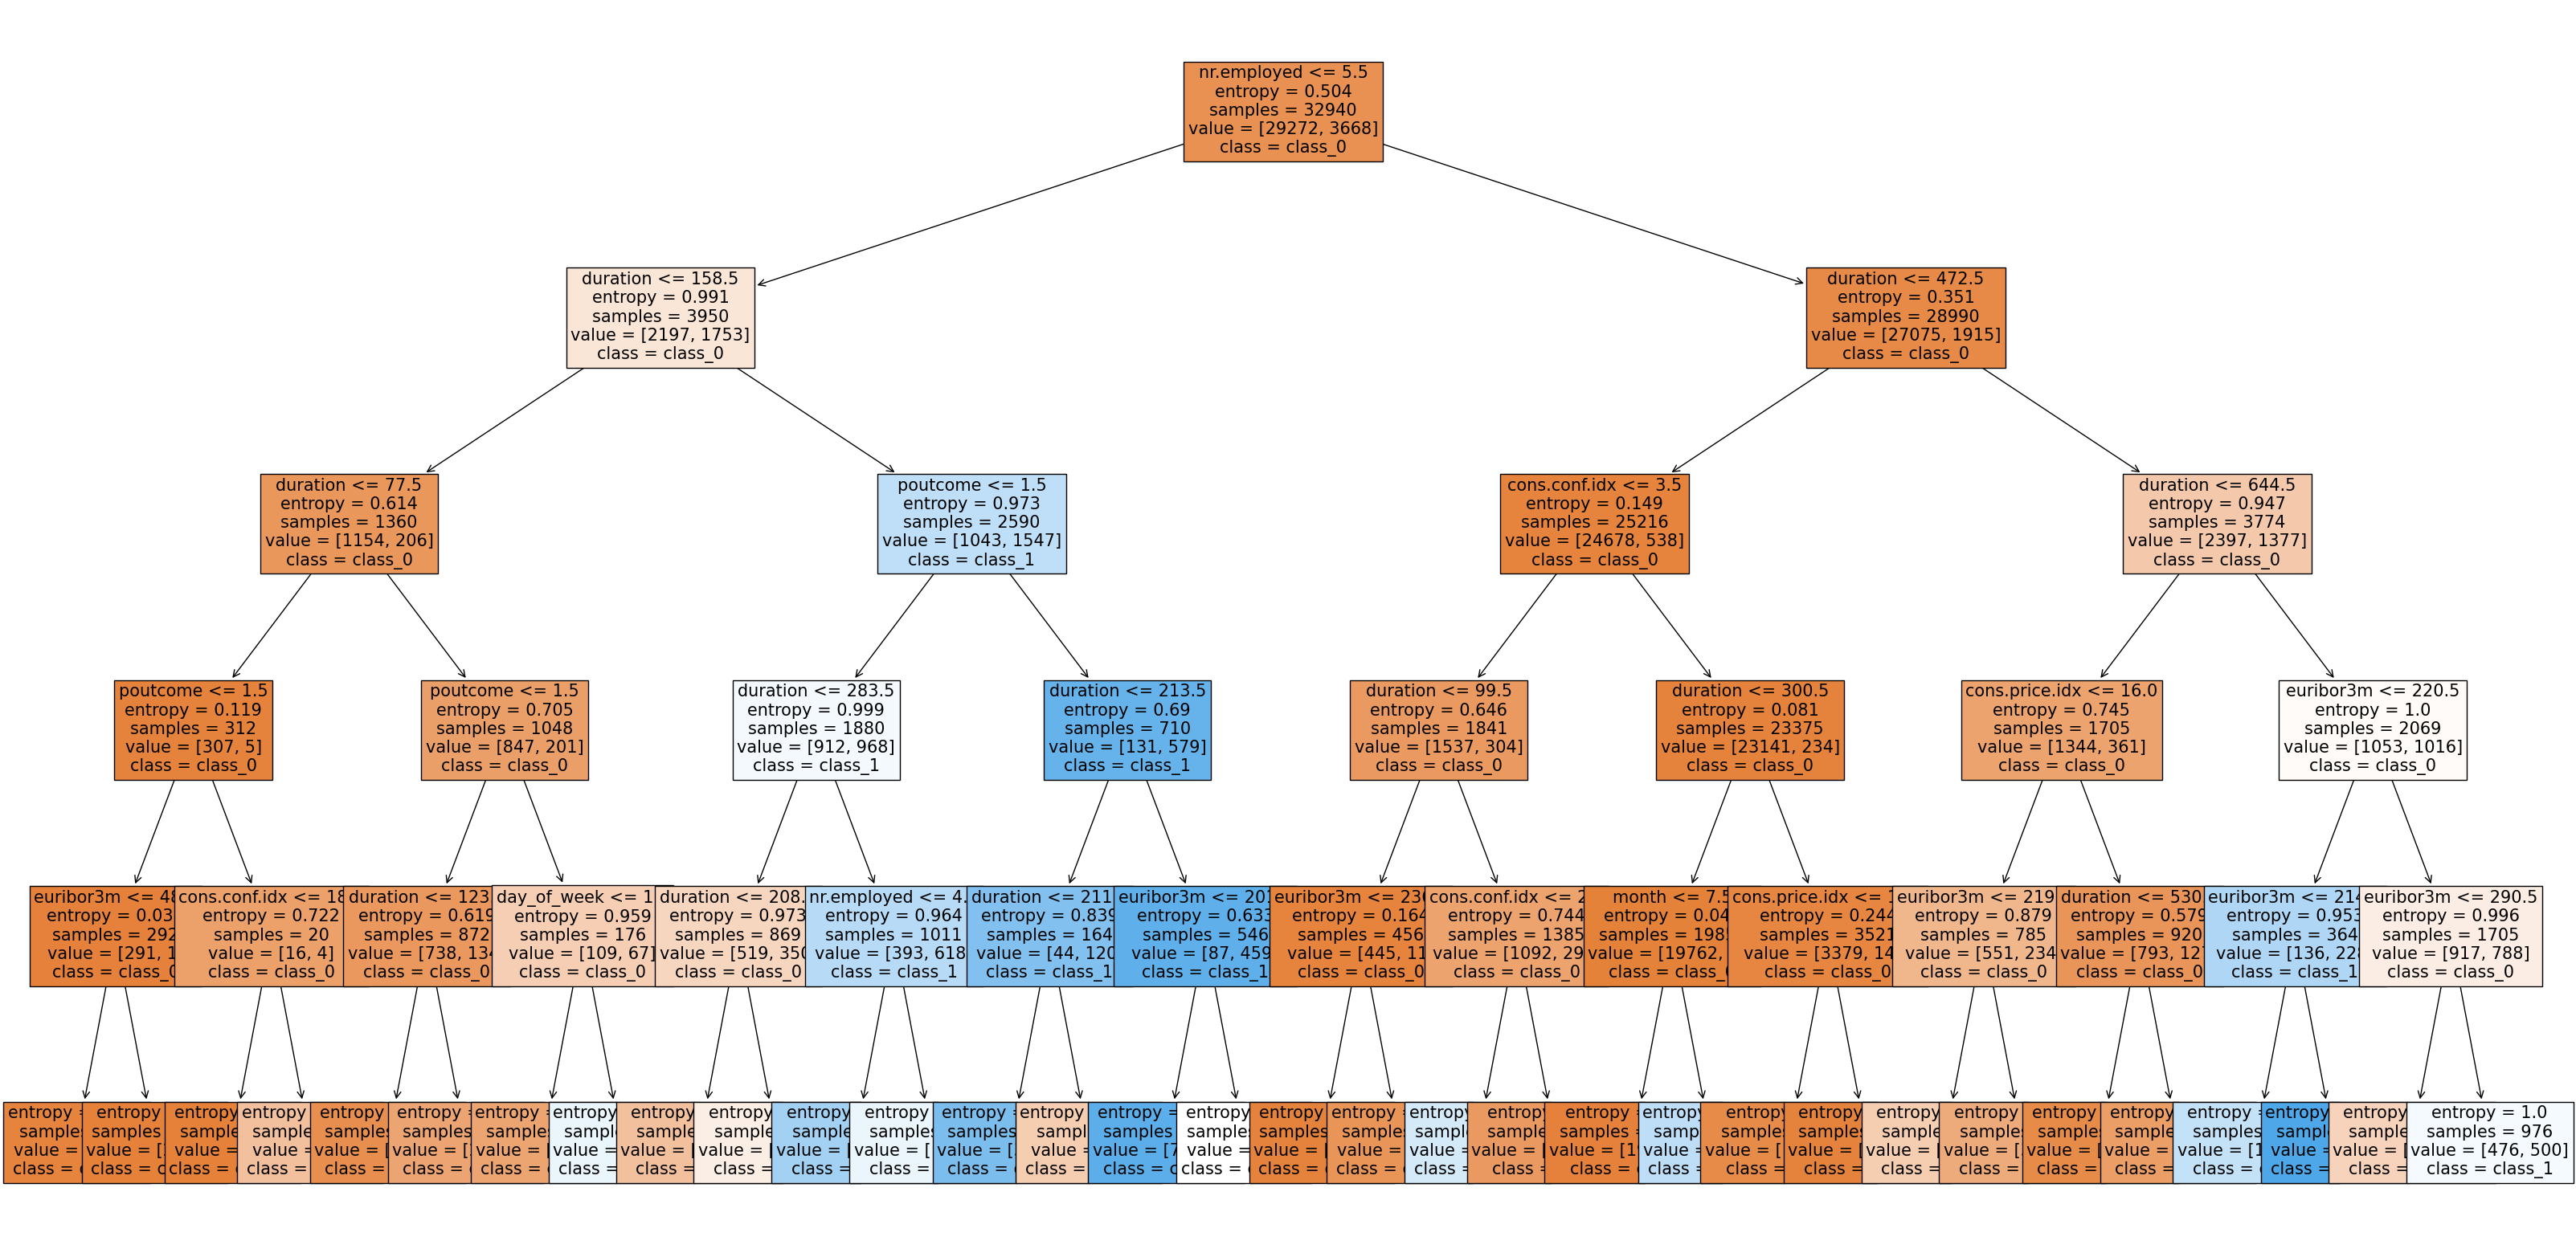

In [80]:
feature_names=df.columns.tolist()
plt.figure(figsize=(40,20))
class_names=["class_0","class_1"]
plot_tree(dc, feature_names=feature_names, class_names=class_names, filled=True,fontsize=15)
plt.show()